# Calculate and plot the correlations of a list of assets


## Imports

In [1]:
%load_ext dotenv
%dotenv ../.env

from investmentstk.figures import correlation
from investmentstk.figures.common import show_figure
from investmentstk.figures.correlation import cluster_by_correlation
from investmentstk.models.asset import Asset
from investmentstk.models.barset import barset_to_single_column_dataframe
from investmentstk.models.source import Source
from investmentstk.utils.dataframe import convert_to_pct_change, merge_dataframes

## Input

In [2]:
# Set this to True when running locally to get interactive charts
# When publishing the notebook on GitHub, we need static images
IS_INTERACTIVE = False

assets = [
    Asset(Source.Avanza, "5325", "NIBE_B"),
    Asset(Source.Avanza, "654081", "QTCOM"),
    Asset(Source.Avanza, "26607", "INDT"),
    Asset(Source.Avanza, "5442", "ANOD_B"),
    Asset(Source.Avanza, "666686", "SECARE"),
    Asset(Source.Avanza, "62369", "CHEMM"),
    Asset(Source.Avanza, "5537", "ADDT_B"),
    Asset(Source.Avanza, "405815", "SAGA_B"),
    Asset(Source.Avanza, "52415", "DSV"),
    Asset(Source.Avanza, "599956", "SINCH"),
    Asset(Source.Avanza, "732279", "ASML"),
    Asset(Source.Avanza, "752256", "SDIP_B"),
    Asset(Source.Avanza, "4965", "ACN"),
    Asset(Source.Avanza, "745819", "RMS"),
    Asset(Source.Avanza, "745787", "TEP"),
    Asset(Source.Avanza, "3401", "INTU"),
    Asset(Source.Avanza, "4134", "TGT"),
    Asset(Source.Avanza, "732311", "SOF"),
    Asset(Source.Avanza, "335653", "EPAM"),
    Asset(Source.Avanza, "158470", "PRCO_B"),
    Asset(Source.Avanza, "36527", "CROX"),
    Asset(Source.Avanza, "376137", "MSCI"),
    Asset(Source.CMC, "X-ABFMB", "US NDAQ"),
    Asset(Source.CMC, "X-AATJL", "Heating Oil"),
    Asset(Source.CMC, "X-AASOB", "Germany 30"),
    Asset(Source.CMC, "X-ALMEO", "Big Tech"),
    Asset(Source.CMC, "X-AAQTP", "Energy Index"),
    Asset(Source.CMC, "X-ABDOR", "Sugar Raw"),
    Asset(Source.CMC, "X-AAYIN", "Natural Gas"),
]

## Format input

In [3]:
assets_dfs = []

for asset in assets:
    bars = asset.retrieve_bars()
    df = barset_to_single_column_dataframe(bars, asset, "close")
    assets_dfs.append(df)

df = merge_dataframes(assets_dfs)
df = convert_to_pct_change(df)

## Plot correlation matrix

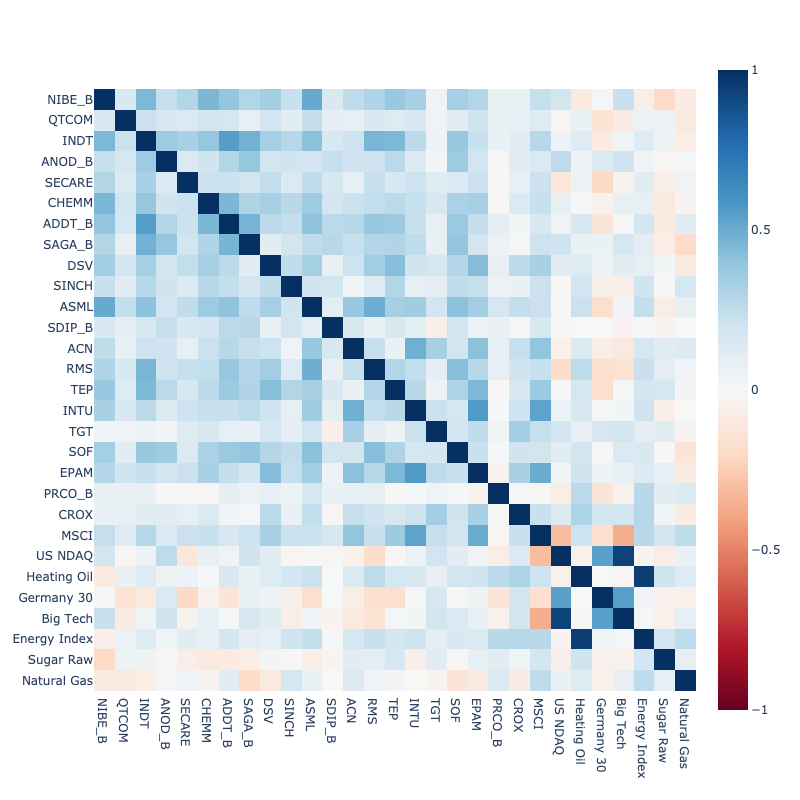

In [4]:
correlations = df.corr()
figure = correlation.generate_figure(correlations, width=800, height=800)
show_figure(figure, interactive=IS_INTERACTIVE)

## Plot clustered correlation matrix

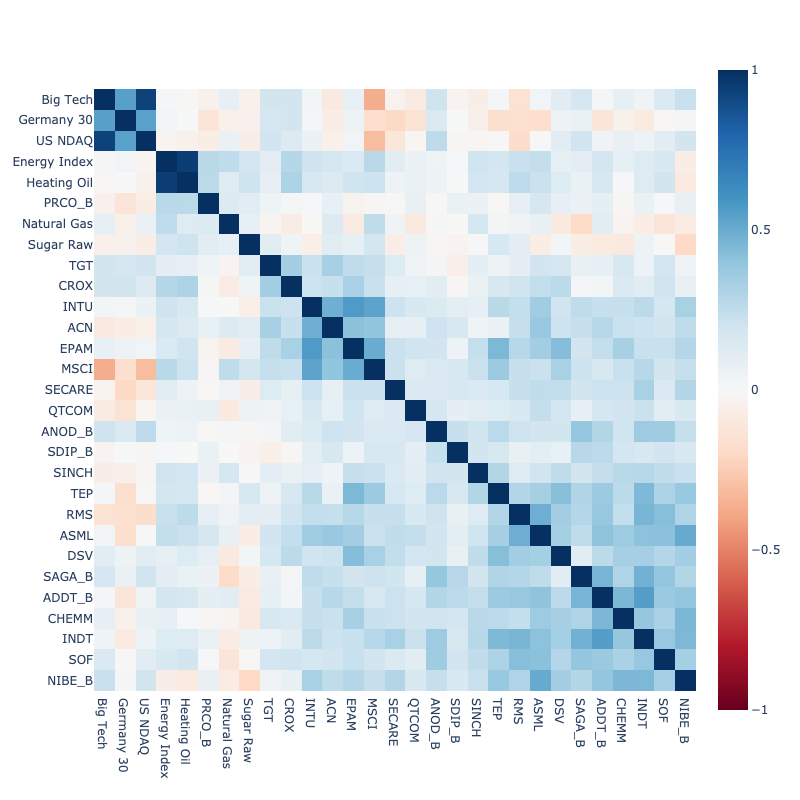

In [5]:
clustered_df = cluster_by_correlation(df)
clustered_df_corr = clustered_df.corr()
figure = correlation.generate_figure(clustered_df_corr, width=800, height=800)
show_figure(figure, interactive=IS_INTERACTIVE)

## Plot clustered correlation matrix, binned

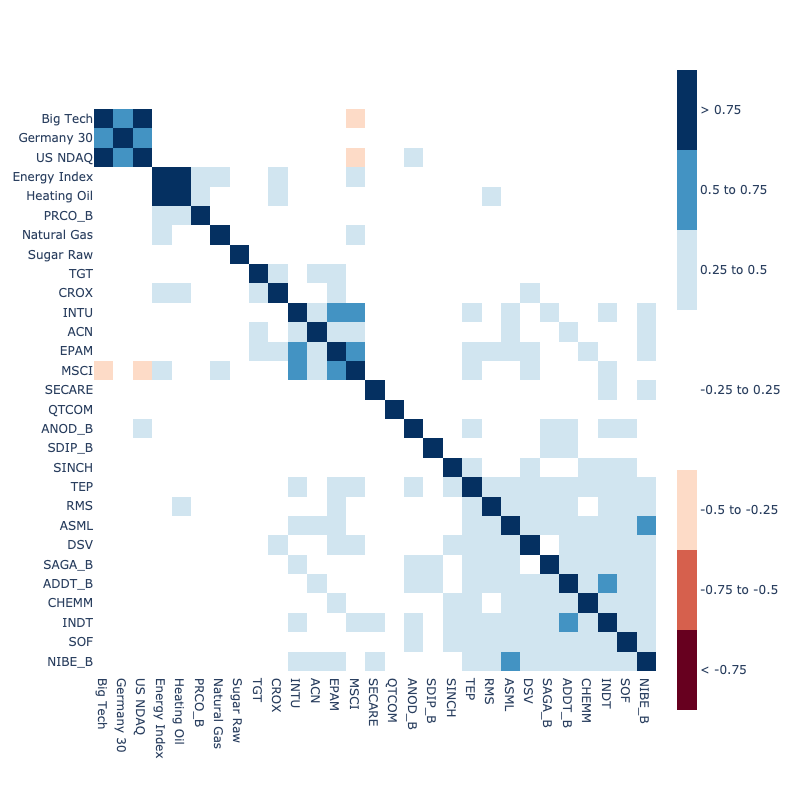

In [6]:
figure = correlation.generate_binned_figure(clustered_df_corr, width=800, height=800)
show_figure(figure, interactive=IS_INTERACTIVE)